# Student Performance Classifier Model
Student performance and grade/semester progeresion are always pegged on final exam or cummulatiove examination performnace.
This ignores other crucial aspects of a student's life which contribute to performance, at times up more than 50%.
By developing this model, we are filling this crucial gap in student assessment with the aim of making it inclusive, adaptive and resilient.

# Step.1 Importing necessary Libraries and Modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Step 2. Loading Dataset

In [5]:
def load_dataset(filepath):
    df = pd.read_csv(filepath)
    return df

In [6]:
filepath = "Datasets/student_performance_large_dataset.csv"

In [7]:
# Calling the function

student_perf = load_dataset(filepath)
student_perf2 = student_perf.copy()

In [8]:
student_perf2.head(50)

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
5,S00006,28,Female,26,Kinesthetic,5,Yes,63,54,80,No,High,25,8,D
6,S00007,19,Female,49,Reading/Writing,13,Yes,91,44,66,Yes,Low,30,10,D
7,S00008,27,Male,14,Reading/Writing,5,Yes,88,56,76,Yes,Low,4,6,C
8,S00009,22,Male,45,Visual,16,No,52,78,70,No,Low,26,9,B
9,S00010,28,Other,35,Auditory,7,No,100,55,100,No,Medium,5,9,C


# Step 3. Inspecting the dataset

In [10]:
# Initializing Inpection function

def inspect_dataset(df):
    """
    inspecting and understanding various aspects od the dataset:
    dataset information, dataset dataset shape, datset stats summaries
    null values and duplicates
    """
    print("\n General dataset information")
    print(df.info())

    print("\n Dataset Statistical Summaries")
    print(df.describe())

    print("\n Missing Values per Column")
    print(df.isna().sum().tolist())

    print("\n Dataset Columns")
    print(df.columns.tolist())

In [11]:
inspect_dataset(student_perf2)


 General dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech      

# Step 4. Dataset Preprocessing

In [13]:
# Identify duplicates
student_perf2.duplicated().sum().tolist()

0

In [14]:
"""
The dataset has zero duplicate values and null values
"""

'\nThe dataset has zero duplicate values and null values\n'

Feature Engineering

In [16]:
# Renaming Columns

student_perf2.rename(columns={"Study_Hours_per_Week": "Study_Hours(P/W)"}, inplace=True)

In [17]:
student_perf2

,Student_ID,Age,Gender,Study_Hours(P/W),Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [18]:
# Renaming column names

student_perf2.rename(columns={
    "Preferred_Learning_Style": "Learning_Style",
    "Online_Courses_Completed": "Online(C/Cmpltd)",
    "Participation_in_Discussions": "Participation(Disc)",
    "Assignment_Completion_Rate (%)": "Ass(Comp_Rate%)",
    "Exam_Score (%)": "Exam_Score",
    "Use_of_Educational_Tech": "Ed_Tech_Use",
    "Self_Reported_Stress_Level": "Stress_Level(Self_R)",
    "Time_Spent_on_Social_Media (hours/week)": "Social_M(H/W)",
    "Sleep_Hours_per_Night": "Sleep_Hrs"
}, inplace=True)

In [19]:
# Renaming columns for easy analysis

student_perf2.rename(columns={"Attendance_Rate (%)": "Att_Rate%"}, inplace = True)

In [20]:
student_perf2

,Student_ID,Age,Gender,Study_Hours(P/W),Learning_Style,Online(C/Cmpltd),Participation(Disc),Ass(Comp_Rate%),Exam_Score,Att_Rate%,Ed_Tech_Use,Stress_Level(Self_R),Social_M(H/W),Sleep_Hrs,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [21]:
# Engineering a new column for performance

student_perf2["Final_Perf"] = student_perf2["Exam_Score"].apply(lambda x: "Pass" if x > 55 else "Fail")

In [22]:
student_perf2

,Student_ID,Age,Gender,Study_Hours(P/W),Learning_Style,Online(C/Cmpltd),Participation(Disc),Ass(Comp_Rate%),Exam_Score,Att_Rate%,Ed_Tech_Use,Stress_Level(Self_R),Social_M(H/W),Sleep_Hrs,Final_Grade,Final_Perf
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,Pass
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,Fail
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,Fail
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,Pass
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C,Pass
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B,Pass
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D,Fail
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D,Fail


In [23]:
student_perf2.columns.tolist()

['Student_ID',
 'Age',
 'Gender',
 'Study_Hours(P/W)',
 'Learning_Style',
 'Online(C/Cmpltd)',
 'Participation(Disc)',
 'Ass(Comp_Rate%)',
 'Exam_Score',
 'Att_Rate%',
 'Ed_Tech_Use',
 'Stress_Level(Self_R)',
 'Social_M(H/W)',
 'Sleep_Hrs',
 'Final_Grade',
 'Final_Perf']

In [24]:
nums_cols = student_perf2.select_dtypes(include = ["number"]).columns
nums_cols

Index(['Age', 'Study_Hours(P/W)', 'Online(C/Cmpltd)', 'Ass(Comp_Rate%)',
       'Exam_Score', 'Att_Rate%', 'Social_M(H/W)', 'Sleep_Hrs'],
      dtype='object')

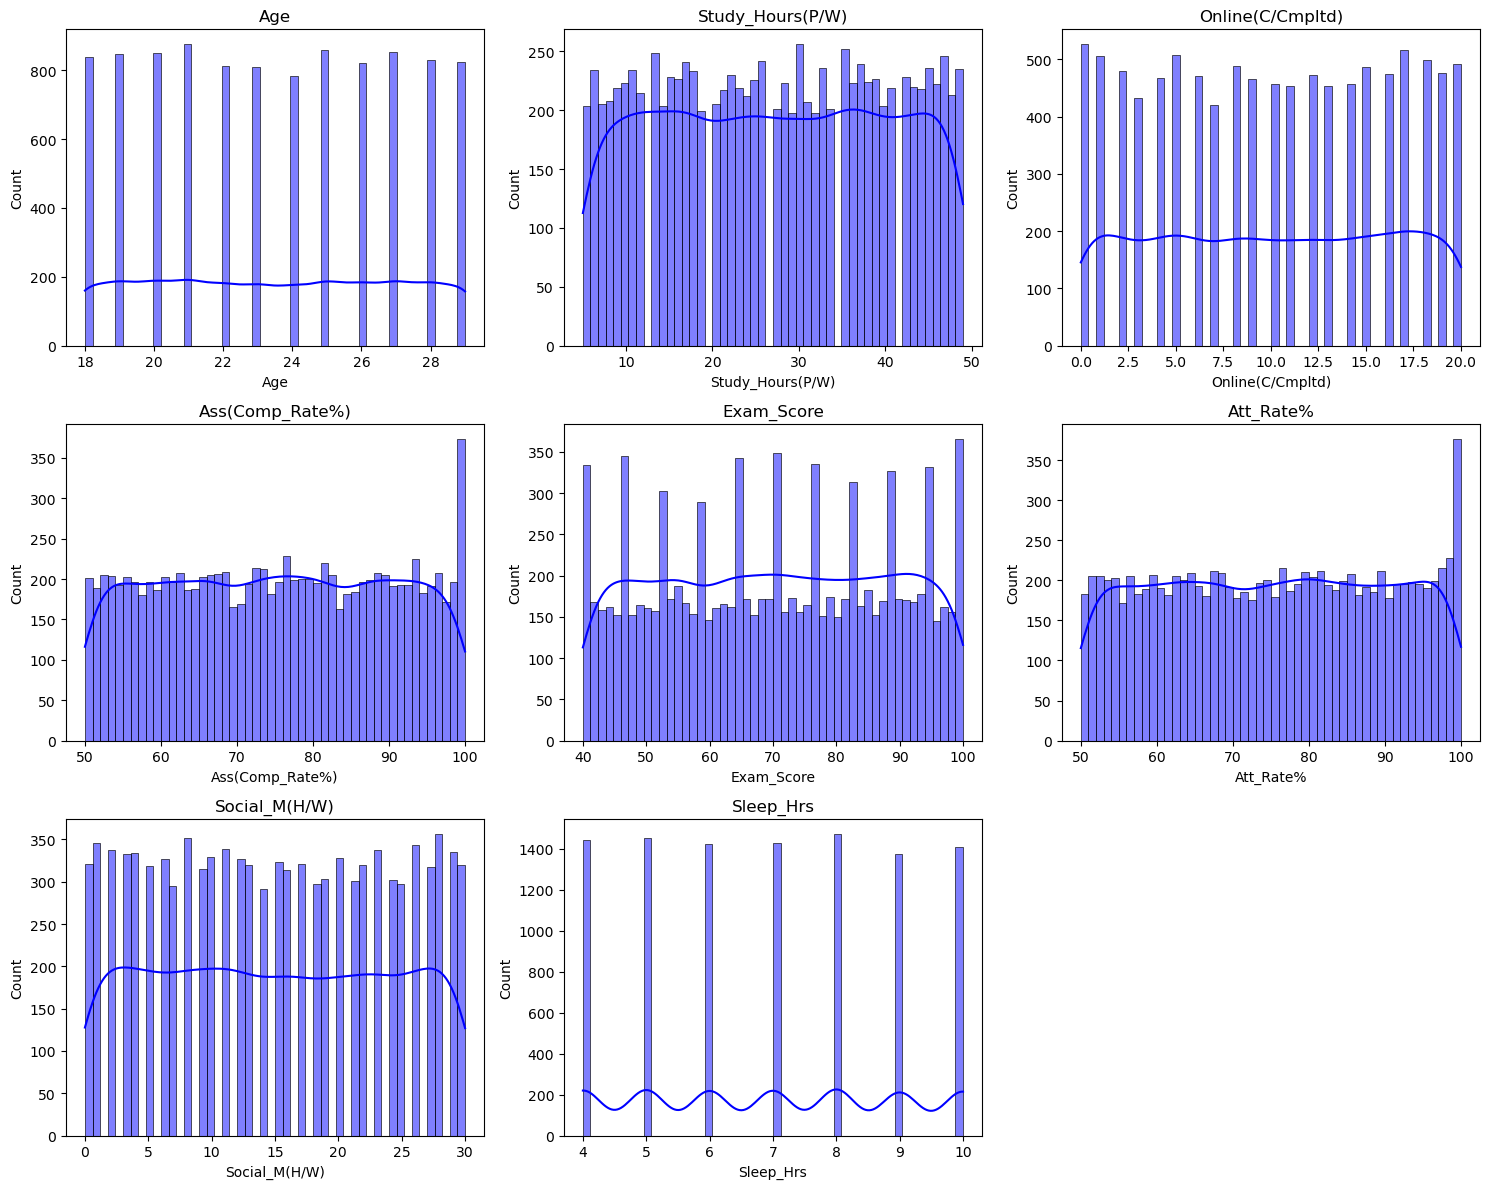

In [25]:
# Checking for distribution

# Set up the figure size and grid layout
num_features = len(nums_cols)
rows = (num_features // 3) + (num_features % 3 > 0)  # Create enough rows for 3 columns per row

plt.figure(figsize=(15, rows * 4))  # Adjust figure size dynamically

# Loop through each numerical column and plot
for i, col in enumerate(nums_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(student_perf2[col], bins=50, kde=True, color="blue")
    plt.title(col)

plt.tight_layout()  # Adjust spacing to fit everything nicely
plt.show()

In [26]:
from scipy.stats.mstats import winsorize

In [27]:
student_perf_Final = student_perf2.copy()
for col in nums_cols:
    student_perf_Final[col] = winsorize(student_perf2[col], 
                                        limits=[0.05, 0.05])  # Caps top and bottom 5%


In [28]:
student_perf_Final

,Student_ID,Age,Gender,Study_Hours(P/W),Learning_Style,Online(C/Cmpltd),Participation(Disc),Ass(Comp_Rate%),Exam_Score,Att_Rate%,Ed_Tech_Use,Stress_Level(Self_R),Social_M(H/W),Sleep_Hrs,Final_Grade,Final_Perf
0,S00001,18,Female,47,Kinesthetic,14,Yes,98,69,66,Yes,High,9,8,C,Pass
1,S00002,29,Female,30,Reading/Writing,19,No,71,42,57,Yes,Medium,28,8,D,Fail
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,Fail
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,Pass
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C,Pass
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B,Pass
9997,S09998,26,Male,23,Visual,3,Yes,54,42,70,No,Medium,20,8,D,Fail
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D,Fail


In [29]:
nums_cols = student_perf_Final.select_dtypes(include = ["number"]).columns
nums_cols

Index(['Age', 'Study_Hours(P/W)', 'Online(C/Cmpltd)', 'Ass(Comp_Rate%)',
       'Exam_Score', 'Att_Rate%', 'Social_M(H/W)', 'Sleep_Hrs'],
      dtype='object')

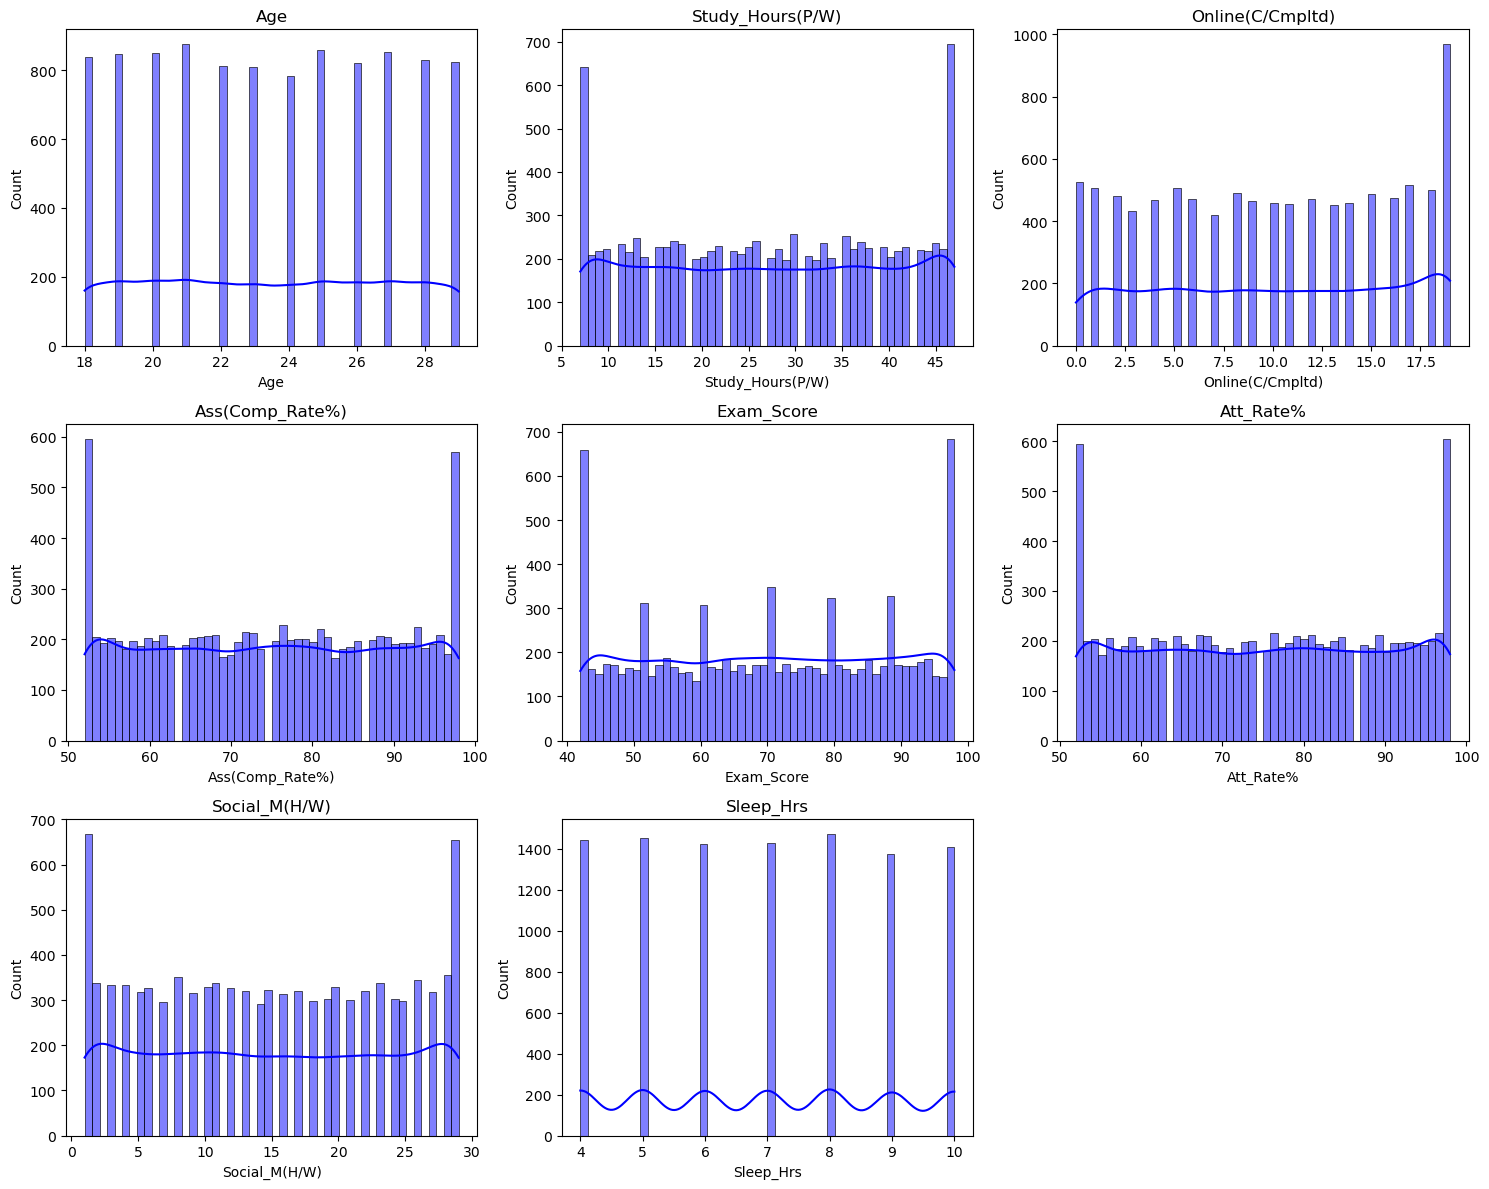

In [30]:
# Checking for distribution after winsorize

# Set up the figure size and grid layout
num_features = len(nums_cols)
rows = (num_features // 3) + (num_features % 3 > 0)  # Create enough rows for 3 columns per row

plt.figure(figsize=(15, rows * 4))  # Adjust figure size dynamically

# Loop through each numerical column and plot
for i, col in enumerate(nums_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(student_perf_Final[col], bins=50, kde=True, color="blue")
    plt.title(col)

plt.tight_layout()  # Adjust spacing to fit everything nicely
plt.show()

In [31]:
student_perf_Final

,Student_ID,Age,Gender,Study_Hours(P/W),Learning_Style,Online(C/Cmpltd),Participation(Disc),Ass(Comp_Rate%),Exam_Score,Att_Rate%,Ed_Tech_Use,Stress_Level(Self_R),Social_M(H/W),Sleep_Hrs,Final_Grade,Final_Perf
0,S00001,18,Female,47,Kinesthetic,14,Yes,98,69,66,Yes,High,9,8,C,Pass
1,S00002,29,Female,30,Reading/Writing,19,No,71,42,57,Yes,Medium,28,8,D,Fail
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,Fail
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,Pass
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C,Pass
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B,Pass
9997,S09998,26,Male,23,Visual,3,Yes,54,42,70,No,Medium,20,8,D,Fail
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D,Fail


In [32]:
# Dropping Student ID, age and gender Column
student_perf_Final1 = student_perf_Final.drop(columns = ["Student_ID", "Age", "Gender" ])


In [33]:
student_perf_Final1.columns.tolist()

['Study_Hours(P/W)',
 'Learning_Style',
 'Online(C/Cmpltd)',
 'Participation(Disc)',
 'Ass(Comp_Rate%)',
 'Exam_Score',
 'Att_Rate%',
 'Ed_Tech_Use',
 'Stress_Level(Self_R)',
 'Social_M(H/W)',
 'Sleep_Hrs',
 'Final_Grade',
 'Final_Perf']

# Step. 5 Splitting the Dataset into X and y

In [35]:
student_perf_Final1

,Study_Hours(P/W),Learning_Style,Online(C/Cmpltd),Participation(Disc),Ass(Comp_Rate%),Exam_Score,Att_Rate%,Ed_Tech_Use,Stress_Level(Self_R),Social_M(H/W),Sleep_Hrs,Final_Grade,Final_Perf
0,47,Kinesthetic,14,Yes,98,69,66,Yes,High,9,8,C,Pass
1,30,Reading/Writing,19,No,71,42,57,Yes,Medium,28,8,D,Fail
2,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,Fail
3,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,Pass
4,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C,Pass
9996,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B,Pass
9997,23,Visual,3,Yes,54,42,70,No,Medium,20,8,D,Fail
9998,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D,Fail


 Feature Encoding

In [37]:
# Selecting categorical columns
cols_cat = student_perf_Final1.select_dtypes(include=["object", "category"]).columns

# Initializing OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Avoids redundant column

# Fitting and transforming categorical columns
encoded_array = encoder.fit_transform(student_perf_Final1[cols_cat])

# Converting to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cols_cat))

# Merging with original DataFrame
student_perf_Final12 = pd.concat([student_perf_Final1.drop(columns=cols_cat), encoded_df], axis=1)

In [38]:
student_perf_Final12

,Study_Hours(P/W),Online(C/Cmpltd),Ass(Comp_Rate%),Exam_Score,Att_Rate%,Social_M(H/W),Sleep_Hrs,Learning_Style_Kinesthetic,Learning_Style_Reading/Writing,Learning_Style_Visual,Participation(Disc)_Yes,Ed_Tech_Use_Yes,Stress_Level(Self_R)_Low,Stress_Level(Self_R)_Medium,Final_Grade_B,Final_Grade_C,Final_Grade_D,Final_Perf_Pass
0,47,14,98,69,66,9,8,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,30,19,71,42,57,28,8,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,47,11,60,43,79,13,7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,13,0,63,70,60,24,10,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,24,19,59,63,93,26,8,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,6,62,58,76,17,6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
9996,16,8,54,84,86,6,5,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
9997,23,3,54,42,70,20,8,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9998,41,7,66,45,90,6,8,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
# Renaming Columns

student_perf_Final12.rename(columns={"Final_Perf_Pass": "Final_Perf"}, inplace = True)

In [40]:
student_perf_Final12.drop(columns = ['Exam_Score'], inplace = True)

In [41]:
X = student_perf_Final12.drop(columns = ["Final_Perf"])
y = student_perf_Final12['Final_Perf']

In [42]:
# Scaling the Training Features

In [43]:
scaler = StandardScaler()

In [44]:
df_cols = X.columns

In [45]:
X_scaled = scaler.fit_transform(X)
# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns = df_cols)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2,
    random_state = 42
)

In [47]:
 X_scaled_df.columns.tolist()

['Study_Hours(P/W)',
 'Online(C/Cmpltd)',
 'Ass(Comp_Rate%)',
 'Att_Rate%',
 'Social_M(H/W)',
 'Sleep_Hrs',
 'Learning_Style_Kinesthetic',
 'Learning_Style_Reading/Writing',
 'Learning_Style_Visual',
 'Participation(Disc)_Yes',
 'Ed_Tech_Use_Yes',
 'Stress_Level(Self_R)_Low',
 'Stress_Level(Self_R)_Medium',
 'Final_Grade_B',
 'Final_Grade_C',
 'Final_Grade_D']

# Step 6. Initializing and Training Models

In [49]:
rf_classifier = RandomForestClassifier(
    random_state = 42,
    n_estimators = 100,
    n_jobs = -1
    
)
rf_classifier

RandomForestClassifier(n_jobs=-1, random_state=42)

In [50]:
# Initialize models with default parameters
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
    
)
gb_classifier

GradientBoostingClassifier(random_state=42)

In [51]:
xgb_classifier = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1,
    random_state=42,
    
)
xgb_classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
# Training the models
xgb_classifier.fit( X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [53]:
rf_classifier.fit( X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [54]:
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [55]:
# Prediction

rf_pred = rf_classifier.predict(X_test)

In [56]:
gb_pred = gb_classifier.predict(X_test)

In [57]:
xgb_pred = xgb_classifier.predict(X_test)

In [58]:
# Evaluation
def evaluate_classification(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    print(f"\n🔹 {model_name} Performance 🔹")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# Predict using trained models
rf_pred_class = rf_classifier.predict(X_test)
gb_pred_class = gb_classifier.predict(X_test)
xgb_pred_class = xgb_classifier.predict(X_test)

# Evaluating each model
evaluate_classification(y_test, rf_pred, "RandomForestClassifier")
evaluate_classification(y_test, gb_pred, "GradientBoostingClassifier")
evaluate_classification(y_test, xgb_pred, "XGBClassifier")


🔹 RandomForestClassifier Performance 🔹
Accuracy: 0.9805
Precision: 0.9810
Recall: 0.9805
F1 Score: 0.9803

Confusion Matrix:
[[ 501   39]
 [   0 1460]]

🔹 GradientBoostingClassifier Performance 🔹
Accuracy: 0.9805
Precision: 0.9810
Recall: 0.9805
F1 Score: 0.9803

Confusion Matrix:
[[ 501   39]
 [   0 1460]]

🔹 XGBClassifier Performance 🔹
Accuracy: 0.9800
Precision: 0.9805
Recall: 0.9800
F1 Score: 0.9798

Confusion Matrix:
[[ 501   39]
 [   1 1459]]


In [67]:
# Since accuracy is high, measure AUC-ROC to check if the model is truly differentiating between classes well.

from sklearn.metrics import roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:,1]))

ROC AUC Score: 0.989113394216134


Debug the model

In [60]:
# Checking for Similarity in training and testing data

print(y_train.value_counts())
print(y_test.value_counts())

Final_Perf
1.0    5926
0.0    2074
Name: count, dtype: int64
Final_Perf
1.0    1460
0.0     540
Name: count, dtype: int64


In [61]:
# Check for Data Leakage
# Ensure that X_train and X_test don’t contain overlapping data.

print(X_test.isin(X_train).sum())

Study_Hours(P/W)                  0
Online(C/Cmpltd)                  0
Ass(Comp_Rate%)                   0
Att_Rate%                         0
Social_M(H/W)                     0
Sleep_Hrs                         0
Learning_Style_Kinesthetic        0
Learning_Style_Reading/Writing    0
Learning_Style_Visual             0
Participation(Disc)_Yes           0
Ed_Tech_Use_Yes                   0
Stress_Level(Self_R)_Low          0
Stress_Level(Self_R)_Medium       0
Final_Grade_B                     0
Final_Grade_C                     0
Final_Grade_D                     0
dtype: int64


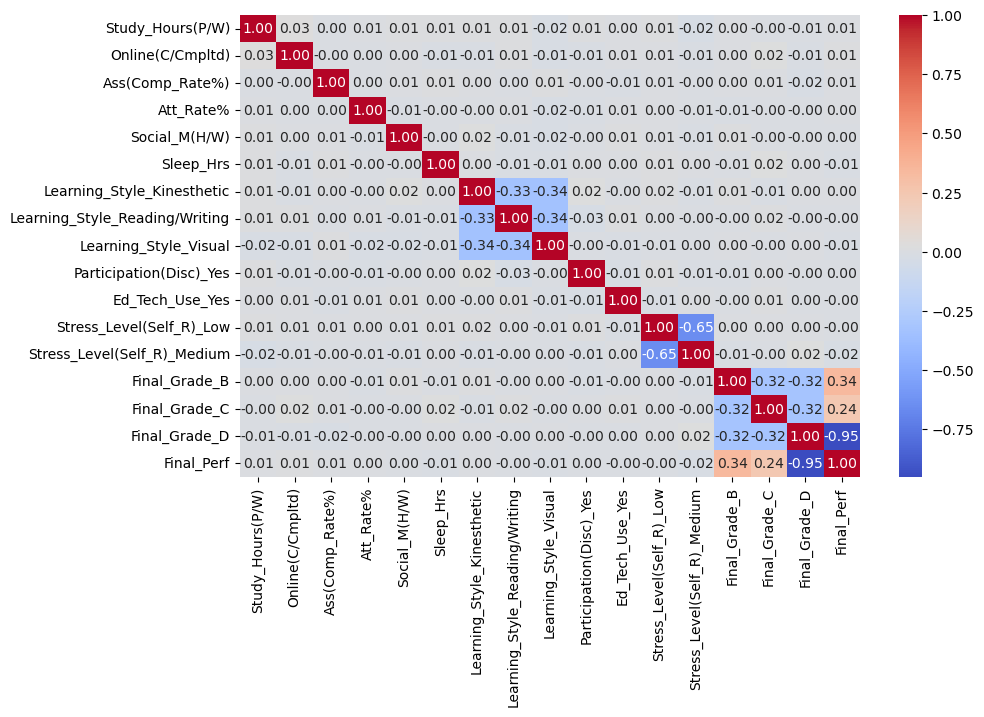

In [69]:
# Check for Target Leakage
# Ensure that none of your features directly correlate with the label (y).

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(student_perf_Final12.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# If one feature has a correlation close to 1 with y, it might be leaking information.

HyperParamater Tuning on The best Model, Gradient Boosting Claassifier

In [71]:


from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7, 10],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'subsample': [0.5, 0.7, 1.0]  # Fraction of samples used for training each tree
}

# Initialize RandomizedSearchCV
random_search_gb_classifier = RandomizedSearchCV(
    estimator=gb_classifier,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy',  # Metric for evaluation
    cv=5,  # 5-fold cross-validation
    verbose=5,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the model
random_search_gb_classifier.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search_gb_classifier.best_params_)

# Best model
best_gb = random_search_gb_classifier.best_estimator_

# Evaluate on test data
accuracy = best_gb.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 0.7, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 3, 'learning_rate': 0.1}
Test Accuracy: 0.9800


<!-- The Models are performing optimumly, as per industry standards -->